#  Timeseries Data Analysis
Unicorn Investors wants to make an investment in a new form of transportation - JetRail. JetRail uses Jet propulsion technology to run rails and move people at a high speed! The investment would only make sense, if they can get more than 1 Million monthly users with in next 18 months. 
##### In order to help Unicorn Ventures in their decision, you need to forecast the traffic on JetRail for the next 7 months. 


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
%matplotlib inline 
import warnings 

Here, we have splitted the data into training and testing dataset. We could have done the analysis on the complete dataset but as we are further using the same dataset for timeseries prediction we have splitted it here.

In [49]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

##### Now, lets see the top 5 rows of the training and testing datset

In [50]:
train.head(5)

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [51]:
test.head(5)

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


##### Make a copy so that we dont loose the original dataset

In [52]:
train_original=train.copy() 
test_original=test.copy()

##### lets have a look at the features of the training and testing dataset

In [53]:
train.columns

Index(['ID', 'Datetime', 'Count'], dtype='object')

In [54]:
test.columns

Index(['ID', 'Datetime'], dtype='object')

##### Lets check the datatype of each feature

In [55]:
train.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [56]:
test.dtypes

ID           int64
Datetime    object
dtype: object

Shape of train and test data

In [57]:
train.shape

(18288, 3)

In [58]:
test.shape

(5112, 2)

Here, Column Datatime is of object datatype. We need to extract information such as date and time from it. Changing the object datatype of Datetime to datetime datatype.

In [59]:
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M')

 Extract year, month, date, hour and day of week from the Datetime feature of dtype datetime and add it to the feature set of the dataset.

In [60]:
for i in (train,test,train_original,test_original):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day'] = i.Datetime.dt.day
    i['hour'] = i.Datetime.dt.hour

In [61]:
train['dayofweek'] = train['Datetime'].dt.dayofweek
temp = train['Datetime']


Assign 1 to weekends and 0 to weekdays

In [62]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

In [63]:
temp2 = train['Datetime'].apply(applyer)
train['weekend'] = temp2


Lets look at the timeseries data


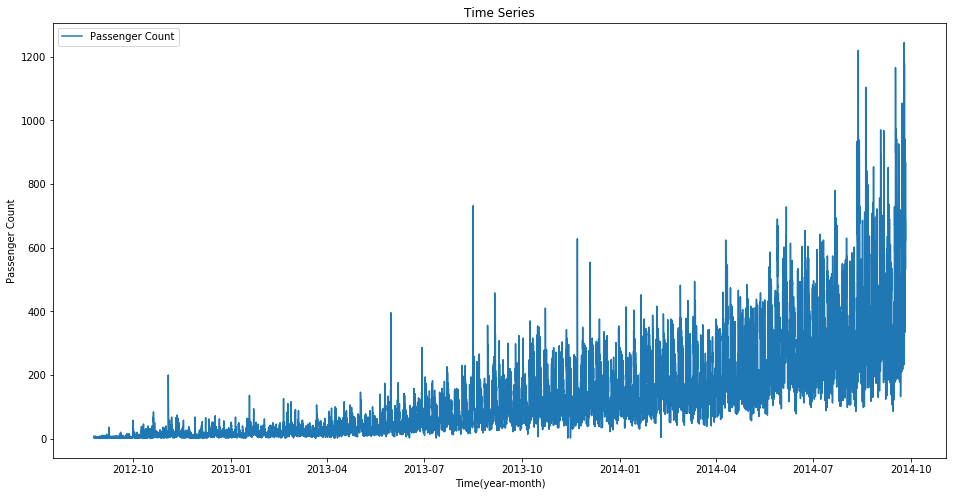

In [64]:
train.index = train['Datetime']
features = train.drop('ID',1)
target = train['Count']
plt.figure(figsize = (16,8))
plt.plot(target, label = "Passenger Count")
plt.title("Time Series")
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger Count")
plt.legend(loc = "best")

##### According to our hypothesis :
1. Traffic will increase as the years pass by

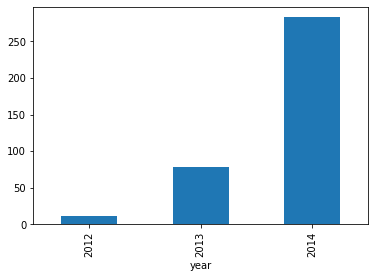

In [65]:
train.groupby('year')['Count'].mean().plot.bar()

2. increase in traffic from May to October- monthly mean

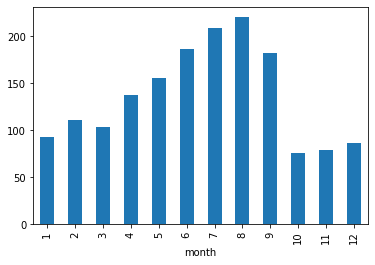

In [66]:
train.groupby('month')['Count'].mean().plot.bar()

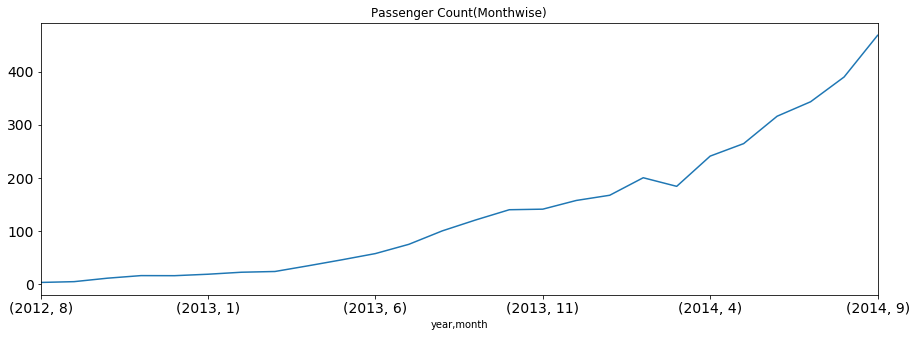

In [67]:
#monthly means of each year separately
temp = train.groupby(['year','month'])['Count'].mean()
temp.plot(figsize=(15,5),title= "Passenger Count(Monthwise)",fontsize = 14)

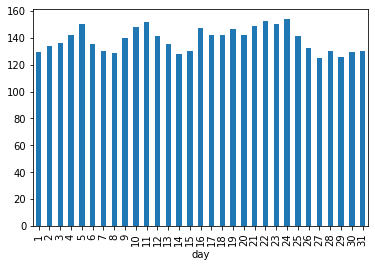

In [68]:
#daily mean of passenger count.
train.groupby('day')['Count'].mean().plot.bar()

3 . traffic will be more during peak hours

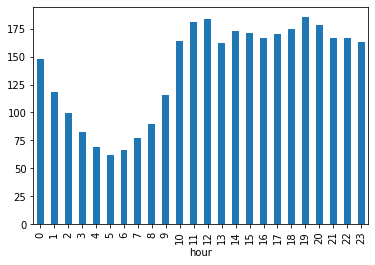

In [69]:
train.groupby('hour')['Count'].mean().plot.bar()

4. traffic will be more on weekdays.


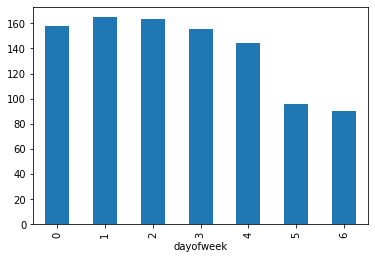

In [70]:
train.groupby('dayofweek')['Count'].mean().plot.bar()

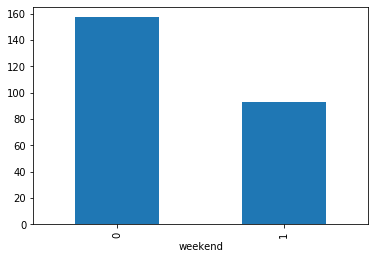

In [71]:
train.groupby('weekend')['Count'].mean().plot.bar()

In [72]:
#make time series to montly,daily,hourly
train = train.drop('ID',1)
train.Timestamp = pd.to_datetime(train.Datetime, format= '%d-%m-%y %H:%M')
train.index = train.Timestamp
# Hourly time series 
hourly = train.resample('H').mean() 
# Converting to daily mean 
daily = train.resample('D').mean() 
# Converting to weekly mean 
weekly = train.resample('W').mean() 
# Converting to monthly mean 
monthly = train.resample('M').mean()

/Users/in-vibha.verma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


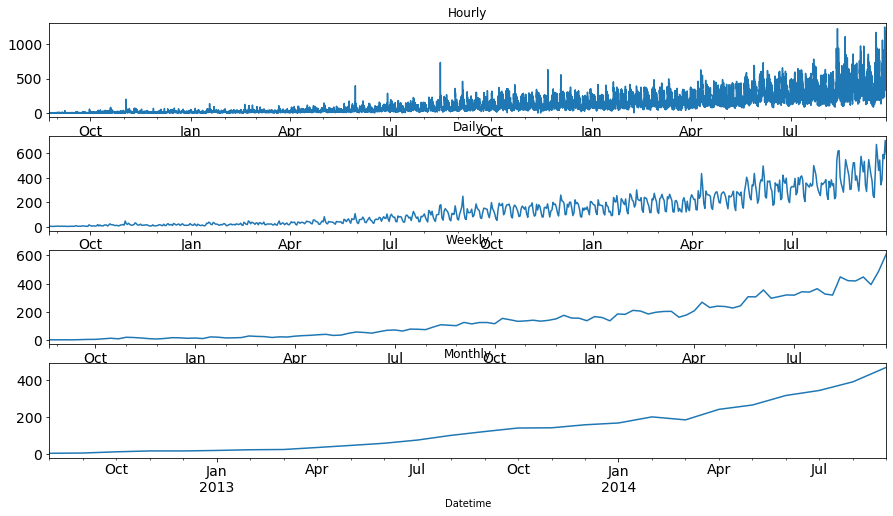

In [73]:
fig, axs = plt.subplots(4,1) 
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0]) 
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1]) 
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2]) 
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3]) 
plt.show()